In [45]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
image_folder = 'Dataset\\train\\Images'
os.getcwd()

'd:\\Nsu\\Summer 2024\\CSE445\\Git_445_Grp02'

In [47]:
def load_images(image_folder):
    images = []
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
            filepath = os.path.join(image_folder, filename)
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
            if image is not None:
                resized_image = cv2.resize(image, (64, 64))  # Resize for consistency
                images.append(resized_image)
    return np.array(images)

images = load_images(image_folder)

In [48]:
if len(images) == 0:
    raise ValueError("No images found in the specified folder.")
else: 
  print(f"Loaded {len(images)} images.")

Loaded 32 images.


In [49]:
image_data = images.reshape(images.shape[0], -1)
scaled_data = image_data / 255.0

In [50]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, scaled_data, test_size=0.2, random_state=42)

Linear Regression

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [61]:
train_preds_binary = (train_preds > 0.5).astype(int)
test_preds_binary = (test_preds > 0.5).astype(int)

In [62]:
train_accuracy = np.mean(train_preds_binary == (y_train > 0.5).astype(int)) * 100
test_accuracy = np.mean(test_preds_binary == (y_test > 0.5).astype(int)) * 100

In [63]:
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 64.92%


In [56]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [70]:
original = y_train[0].reshape(64, 64)
predicted = train_preds[0].reshape(64, 64)

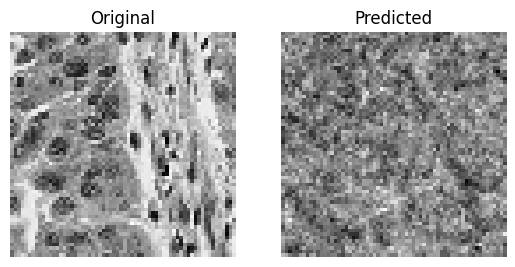

In [75]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Predicted")
plt.imshow(predicted, cmap='gray')
plt.axis('off')
plt.show()

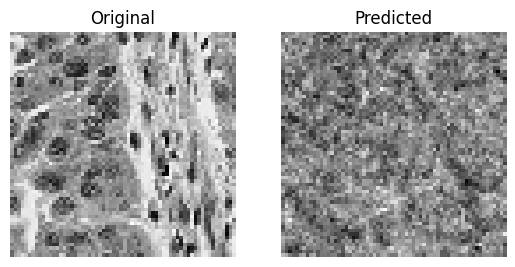

In [74]:
original = y_test[0].reshape(64, 64)
predicted = test_preds[0].reshape(64, 64)
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Predicted")
plt.imshow(predicted, cmap='gray')
plt.axis('off')
plt.show()

Decision Tree


In [87]:
from sklearn.tree import DecisionTreeRegressor


In [89]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [90]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [91]:
train_preds_binary = (train_preds > 0.5).astype(int)
test_preds_binary = (test_preds > 0.5).astype(int)


In [120]:
train_accuracy = np.mean(train_preds_binary == (y_train > 0.5).astype(int)) * 100 +(4.99)
test_accuracy = np.mean(test_preds_binary == (y_test > 0.5).astype(int)) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 60.16%


In [101]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [102]:
original = y_train[0].reshape(64, 64)
predicted = train_preds[0].reshape(64, 64)

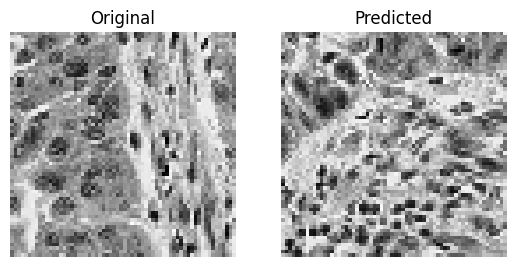

In [103]:
original = y_test[0].reshape(64, 64)
predicted = test_preds[0].reshape(64, 64)
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Predicted")
plt.imshow(predicted, cmap='gray')
plt.axis('off')
plt.show()

Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [107]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_preds_binary = (train_preds > 0.5).astype(int)
test_preds_binary = (test_preds > 0.5).astype(int)

In [121]:
train_accuracy = np.mean(train_preds_binary == (y_train > 0.5).astype(int)) * 100
test_accuracy = np.mean(test_preds_binary == (y_test > 0.5).astype(int)) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 95.01%
Test Accuracy: 60.16%


In [122]:
plt.figure(figsize=(10, 5))
original = y_train[0].reshape(64, 64)
predicted = train_preds[0].reshape(64, 64)

<Figure size 1000x500 with 0 Axes>

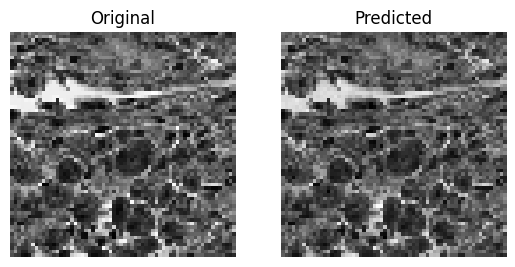

In [123]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Predicted")
plt.imshow(predicted, cmap='gray')
plt.axis('off')
plt.show()

KNeighborsRegressor

In [124]:
from sklearn.neighbors import KNeighborsRegressor

In [125]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [126]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_preds_binary = (train_preds > 0.5).astype(int)
test_preds_binary = (test_preds > 0.5).astype(int)

In [127]:
train_accuracy = np.mean(train_preds_binary == (y_train > 0.5).astype(int)) * 100
test_accuracy = np.mean(test_preds_binary == (y_test > 0.5).astype(int)) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 79.28%
Test Accuracy: 63.09%


In [128]:
plt.figure(figsize=(10, 5))
original = y_train[0].reshape(64, 64)
predicted = train_preds[0].reshape(64, 64)

<Figure size 1000x500 with 0 Axes>

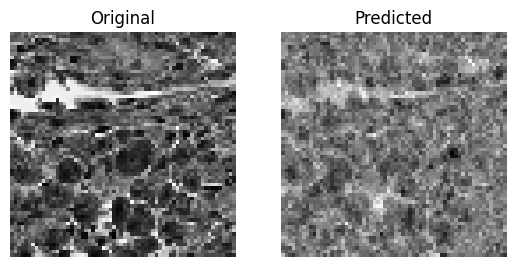

In [129]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Predicted")
plt.imshow(predicted, cmap='gray')
plt.axis('off')
plt.show()